In [2]:
import pandas as pd 
import numpy as np
import numpy.linalg as lalg
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.regularizers as rg
from sklearn.model_selection import KFold
from Models import *

In [3]:
auto = pd.read_csv("../data/auto-mpg.csv")
auto.fillna(auto.mean())
x = auto[auto.columns[1:7]].to_numpy()
ox = np.insert(x, 0, 1.0, axis = 1)
y = auto[auto.columns[0]].to_numpy()

In [19]:
def auto_pcp_build(x, y, suppress = False): 
    model = keras.Sequential()
    model.add(layers.Dense(1, input_dim = x.shape[1], 
                           kernel_initializer = "uniform", 
                           activation = "relu", 
                           use_bias = False))
    optimizer = keras.optimizers.Adam(learning_rate = 0.0005)
    model.compile(loss = "mean_squared_error", optimizer = optimizer)
    return model

auto_perceptron = Perceptron(ox, y, 0.1, build_fn = auto_pcp_build)
forward_pcp = auto_perceptron.forward_selection(500)
backward_pcp = auto_perceptron.backward_elimination(500)
step_pcp = auto_perceptron.stepwise_regression(500)

[0, 5]
0.17345961401558885
[0, 5, 2]
0.5378872897051558
[0, 5, 2, 6]
0.7318972312859473
[0, 5, 2, 6, 3]
0.7487833257622392
[0, 5, 2, 6, 3, 4]
0.7944106145628861
[0, 5, 2, 6, 3, 4, 1]
0.7960915860465115
[0, 2, 3, 4, 5, 6]
0.7947366303403158
[0, 2, 4, 5, 6]
0.7999506392551743
[0, 2, 4, 5]
0.5236206736207614
[0, 2, 4]
0.2810162609136557
[0, 4]
-9.099453138582634
[0]
[0, 5]
[0, 5, 3]
[0, 5, 3, 6]
[0, 5, 3, 6, 4]
[0, 5, 3, 6, 4, 2]


In [24]:
auto_3L = NeuralNet3L(ox, y, build_fn = NeuralNet3L.build_model)
forward_3L = auto_3L.forward_selection()
backward_3L = auto_3L.backward_elimination()
step_3L = auto_3L.stepwise_regression()

Model: "sequential_132"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_165 (Dense)            (None, 7)                 49        
_________________________________________________________________
dense_166 (Dense)            (None, 1)                 8         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
[0, 5]
0.17349761829833787
[0, 5, 4]
0.7025579933878742
[0, 5, 4, 6]
0.7994057937019368
[0, 5, 4, 6, 3]
0.8676778085283348
[0, 5, 4, 6, 3, 2]
0.8771812636975427
[0, 5, 4, 6, 3, 2, 1]
0.8623794279135096
[0, 1, 2, 3, 4, 5]
0.691735217993965
[0, 1, 2, 3, 4]
0.40941865162085034
[0, 1, 3, 4]
0.7344718185173074
[0, 1, 3]
0.7299316722380964
[0, 3]
0.6757957716331338
[0]
[0, 5]
[0, 5, 2]
[0, 5, 2, 6]
[0, 5, 2, 6, 4]
[0, 5, 2, 6, 4, 1]


In [6]:
auto_4L = NeuralNet4L(ox, y, build_fn = NeuralNet4L.build_model)
forward_4L = auto_4L.forward_selection()
backward_4L = auto_4L.backward_elimination()
step_4L = auto_4L.stepwise_regression()

Model: "sequential_159"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_238 (Dense)            (None, 7)                 49        
_________________________________________________________________
dense_239 (Dense)            (None, 3)                 24        
_________________________________________________________________
dense_240 (Dense)            (None, 1)                 4         
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________
[0, 3]
0.69278661402488
[0, 3, 4]
0.6804354435280908
[0, 3, 4, 2]
0.7180777133116263
[0, 3, 4, 2, 5]
0.7788811220998375
[0, 3, 4, 2, 5, 6]
0.8661134407988617
[0, 3, 4, 2, 5, 6, 1]
-0.015589161297244525
[0, 1, 3, 4, 5, 6]
0.8630477938496945
[0, 1, 4, 5, 6]
0.7993404277560061
[0, 4, 5, 6]
0.8399974784345796
[0, 4, 5]
0.6205052202260947
[0, 4]
-0.002528001262684043
[0]
[0, 5]
[0, 5, 4]


In [21]:
def print_fit(model): 
    print(f"""
            Rsq = {model.rsq()}
            Rsq_adj = {model.rsq_adj()}
            AIC = {model.aic()}
          """)

auto_perceptron = Perceptron(ox, y, 0.1, build_fn = auto_pcp_build)
auto_3L = NeuralNet3L(ox, y, build_fn = NeuralNet3L.build_model)

auto_4L = NeuralNet4L(ox[:,[0,3,4,2,5,6]], y, build_fn = NeuralNet4L.build_model)

auto_perceptron.train(500)
auto_3L.train(200)
auto_4L.train(300)

print_fit(auto_perceptron)
print_fit(auto_3L)
print_fit(auto_4L)

Model: "sequential_130"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_160 (Dense)            (None, 7)                 49        
_________________________________________________________________
dense_161 (Dense)            (None, 1)                 8         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_131"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_162 (Dense)            (None, 6)                 36        
_________________________________________________________________
dense_163 (Dense)            (None, 3)                 21        
_________________________________________________________________
dense_164 (Dense)            (None, 1)                 4         
Total params: 61
Trainable param

In [10]:
ridge_perceptron = keras.Sequential()
ridge_perceptron.add(layers.Dense(1, input_dim = 7, 
                                 kernel_initializer = "uniform", 
                                 activation = "relu", 
                                 use_bias = False,
                                 kernel_regularizer = rg.l2(0.01)))

optimizer = keras.optimizers.Adam(learning_rate = 0.0005)
ridge_perceptron.compile(loss = "mean_squared_error", optimizer = optimizer)

In [22]:
ridge_perceptron.fit(ox, y, epochs = 50, batch_size = 10, verbose = 0)
#rsq = metrics.rsq(ridge_perceptron, ox, y)
rsq_cv = metrics.rsq_cv(ridge_perceptron, ox, y, epochs = 500)
print(f"Rsq = {rsq} Rsq_cv = {rsq_cv}")

Rsq = 0.36407172679901123 Rsq_cv = 0.7940431296825409


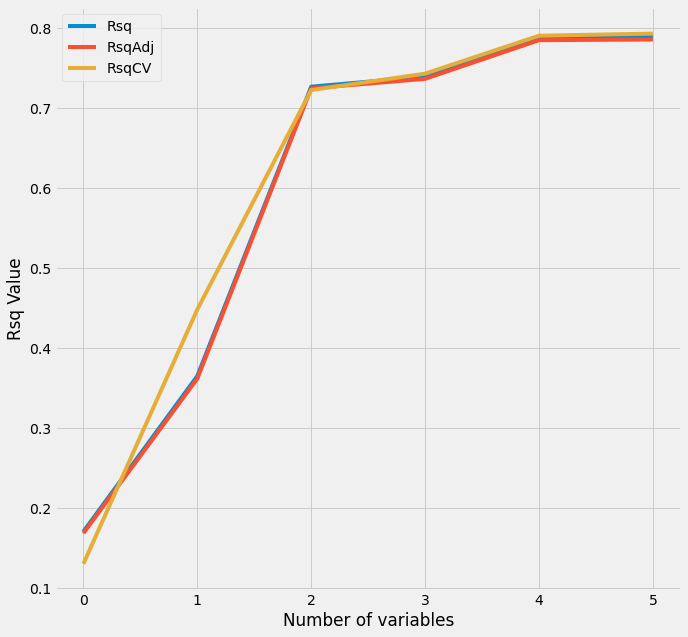

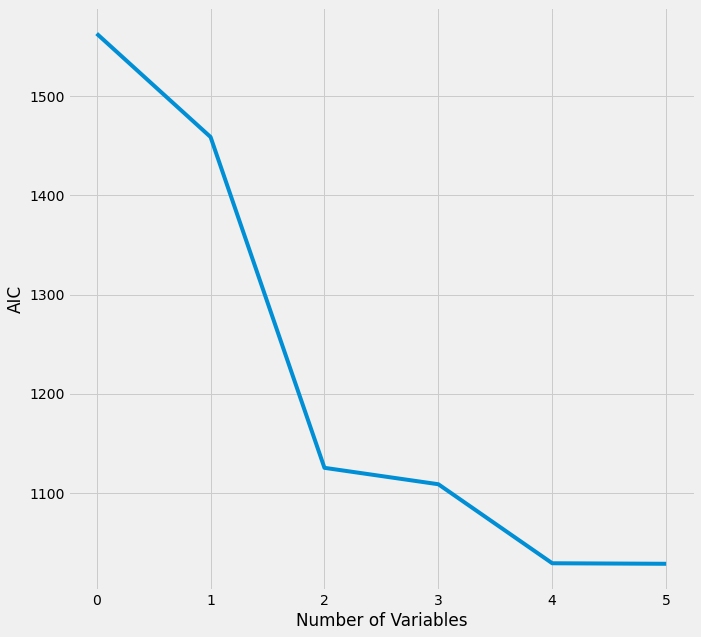

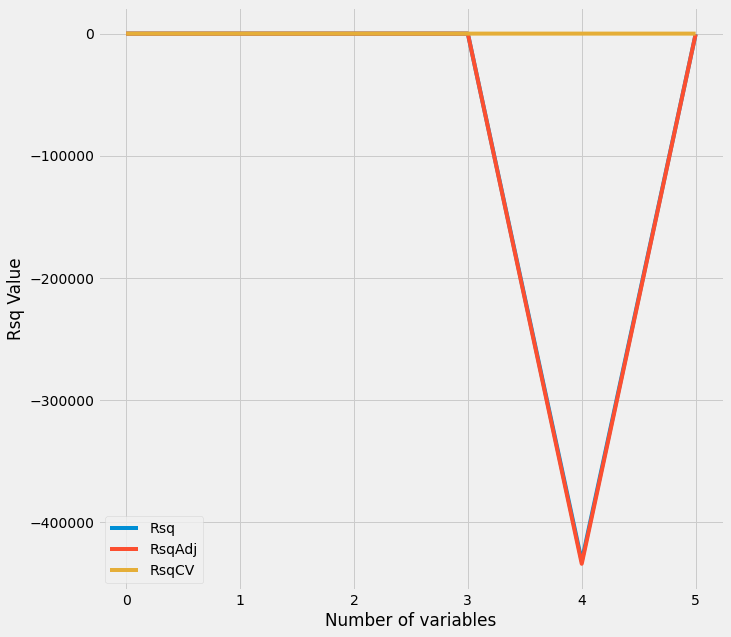

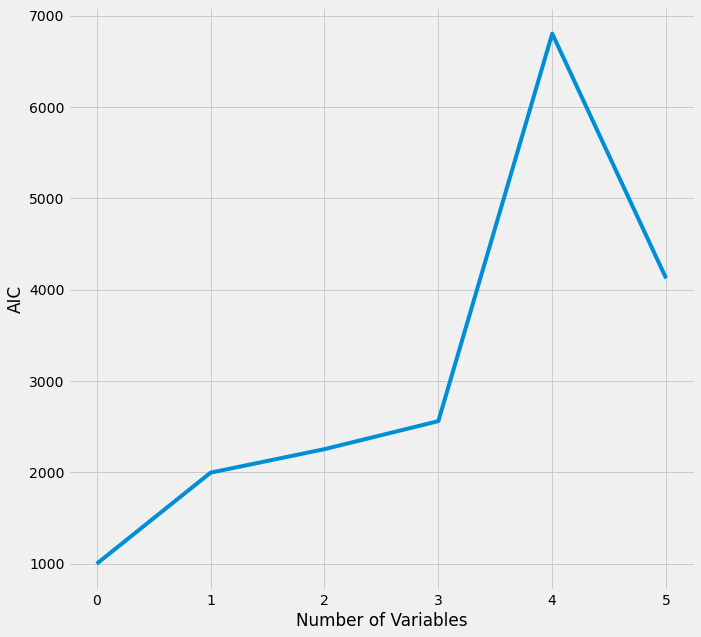

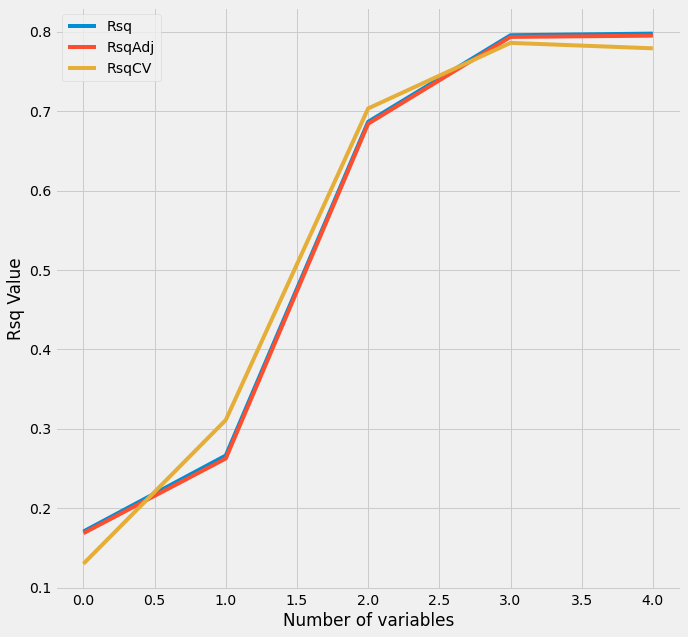

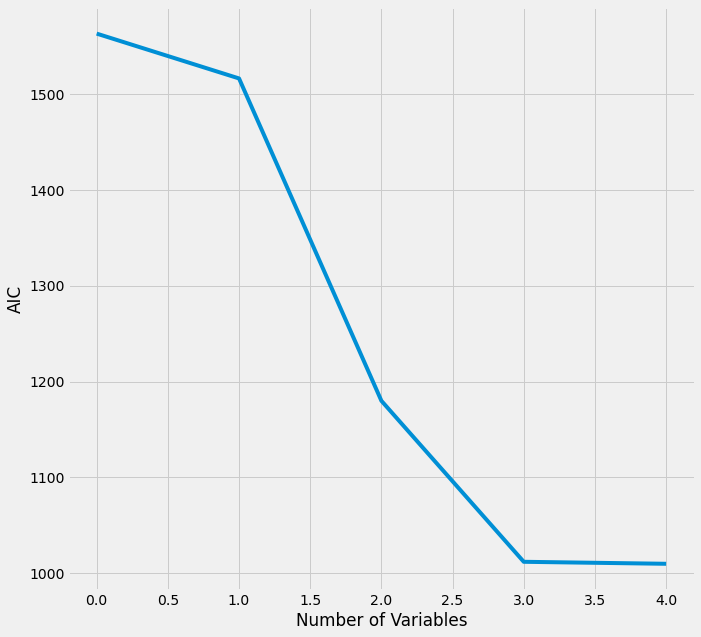

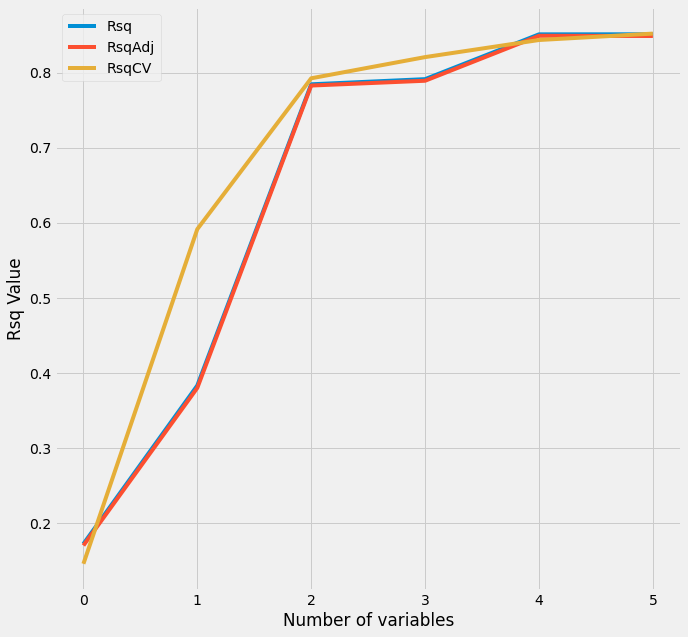

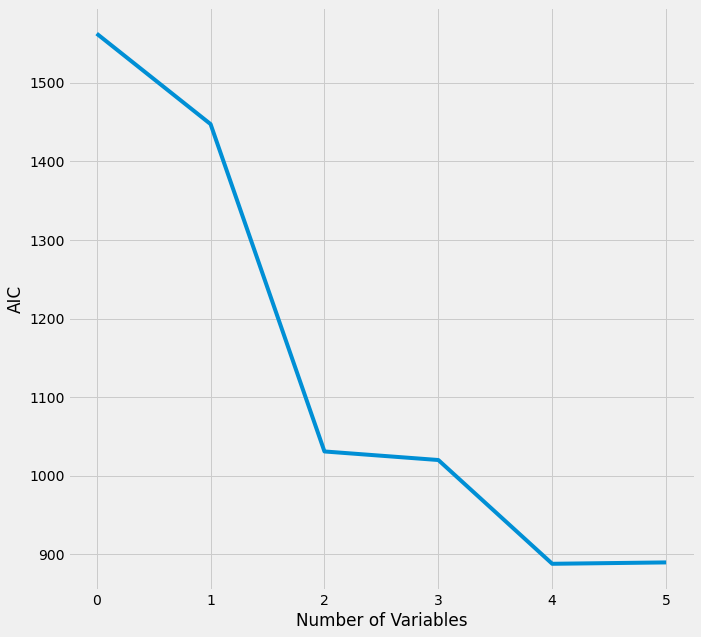

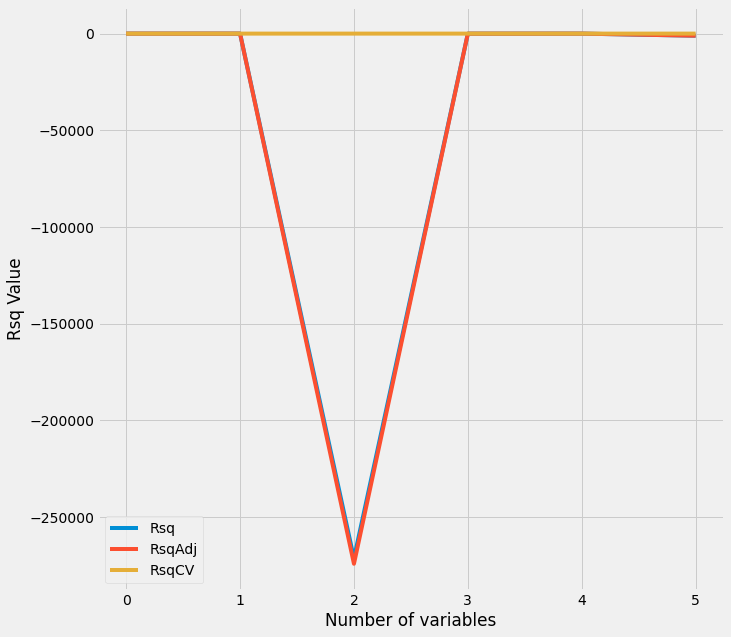

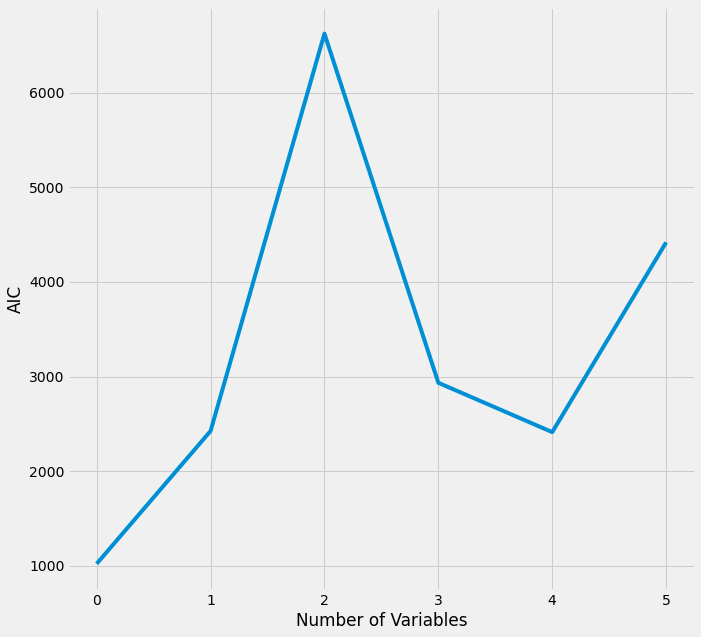

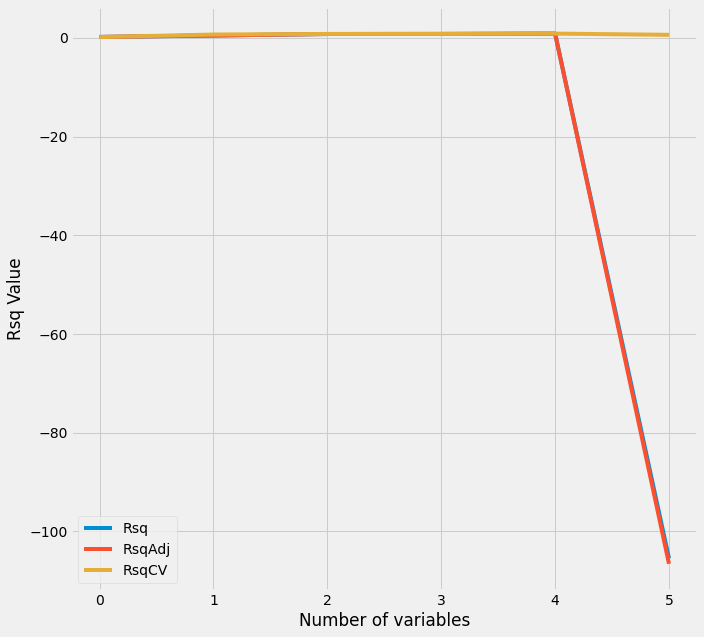

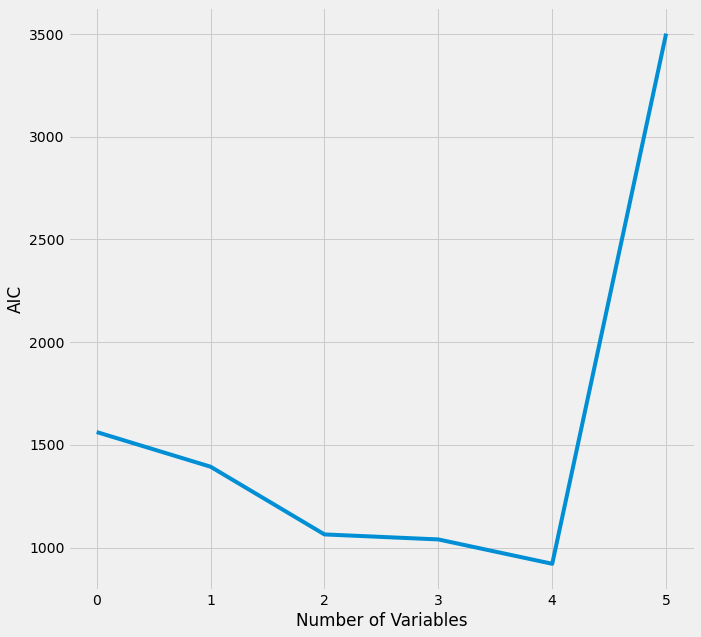

NameError: name 'forward_4L' is not defined

In [25]:
def plot_and_save(arrays, name, basepath = "../plots/python/"): 
    rsq, rsq_a, rsq_cv, aic = arrays
    x = [_ for _ in range(len(rsq))]
    plt.style.use("fivethirtyeight")
    plt.rcParams["figure.figsize"] = [10,10]
    plt.plot(x, np.array([rsq, rsq_a, rsq_cv]).transpose())
    plt.xlabel("Number of variables")
    plt.ylabel("Rsq Value")
    plt.legend(["Rsq", "RsqAdj", "RsqCV"])
    plt.savefig(basepath+name)
    plt.show()
    
    plt.style.use("fivethirtyeight")
    plt.plot(x, aic)
    plt.xlabel("Number of Variables")
    plt.ylabel("AIC")
    plt.savefig(basepath+"AIC"+name)
    plt.show()
    
plot_and_save(forward_pcp, "AutoForwardPCP.png")
plot_and_save(backward_pcp, "BackWardPCP.png")
plot_and_save(step_pcp, "StepwisePCP.png")

plot_and_save(forward_3L, "AutoForward3L.png")
plot_and_save(backward_3L, "BackWard3L.png")
plot_and_save(step_3L, "Stepwise3L.png")

plot_and_save(forward_4L, "AutoForward4L.png")
plot_and_save(backward_4L, "BackWard4L.png")
plot_and_save(step_4L, "Stepwise4L.png")
